<a href="https://colab.research.google.com/github/karan51ngh/machineLearning/blob/main/multipleLinearRegression/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##2.Loading Data

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MLLearningData/multiple_linear_regression.csv')

In [4]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.describe()

,Feature 1,Feature 2,Feature 3,Target
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
data.shape

(200, 4)

##3.Data Preprocessing

In [11]:
data.dropna()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
data.shape

(200, 4)

##4.Data Splitting

In [14]:
y=data.iloc[:,-1]

In [16]:
x=data.iloc[:,0:-1]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 64)

In [19]:
x_train

,Feature 1,Feature 2,Feature 3
5,8.7,48.9,75.0
19,147.3,23.9,19.1
55,198.9,49.4,60.0
192,17.2,4.1,31.6
185,205.0,45.1,19.6
...,...,...,...
51,100.4,9.6,3.6
54,262.7,28.8,15.9
166,17.9,37.6,21.6
119,19.4,16.0,22.3


In [20]:
x_test

,Feature 1,Feature 2,Feature 3
58,210.8,49.6,37.7
163,163.5,36.8,7.4
41,177.0,33.4,38.7
156,93.9,43.5,50.5
14,204.1,32.9,46.0
86,76.3,27.5,16.0
109,255.4,26.9,5.5
193,166.8,42.0,3.6
35,290.7,4.1,8.5
121,18.8,21.7,50.4


##5.Linear Regression


####5.1.Training Model

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lr.coef_

array([ 0.04654543,  0.18817743, -0.00658357])

In [23]:
lr.intercept_

3.0500258183225455

####5.2.Predicting Test Input

In [24]:
predicted_value = lr.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, predicted_value)

In [26]:
cost

3.8243572216662165

####5.3.Visualizing 

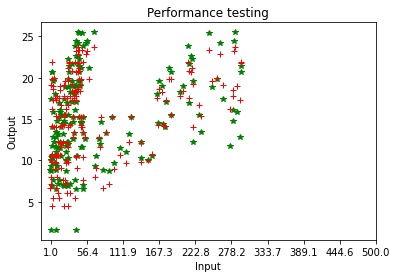

In [27]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()